In this MLR model we analyse how different factors like the no. of hours studied, previous scores, extraCurr activities, sleep hours and sample papers practiced affect the performance index of a student


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
def change(x):
    if x =='Yes':
        return 0
    else:
        return 1
data['Extracurricular Activities'] = data['Extracurricular Activities'].apply(change)

In [6]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0,9,1,91.0
1,4,82,1,4,2,65.0
2,8,51,0,7,2,45.0
3,5,52,0,5,2,36.0
4,7,75,1,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,0,4,2,23.0
9996,7,64,0,8,5,58.0
9997,6,83,0,8,5,74.0
9998,9,97,0,7,0,95.0


In [8]:
colheaders = data.columns.values
colheaders

array(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced',
       'Performance Index'], dtype=object)

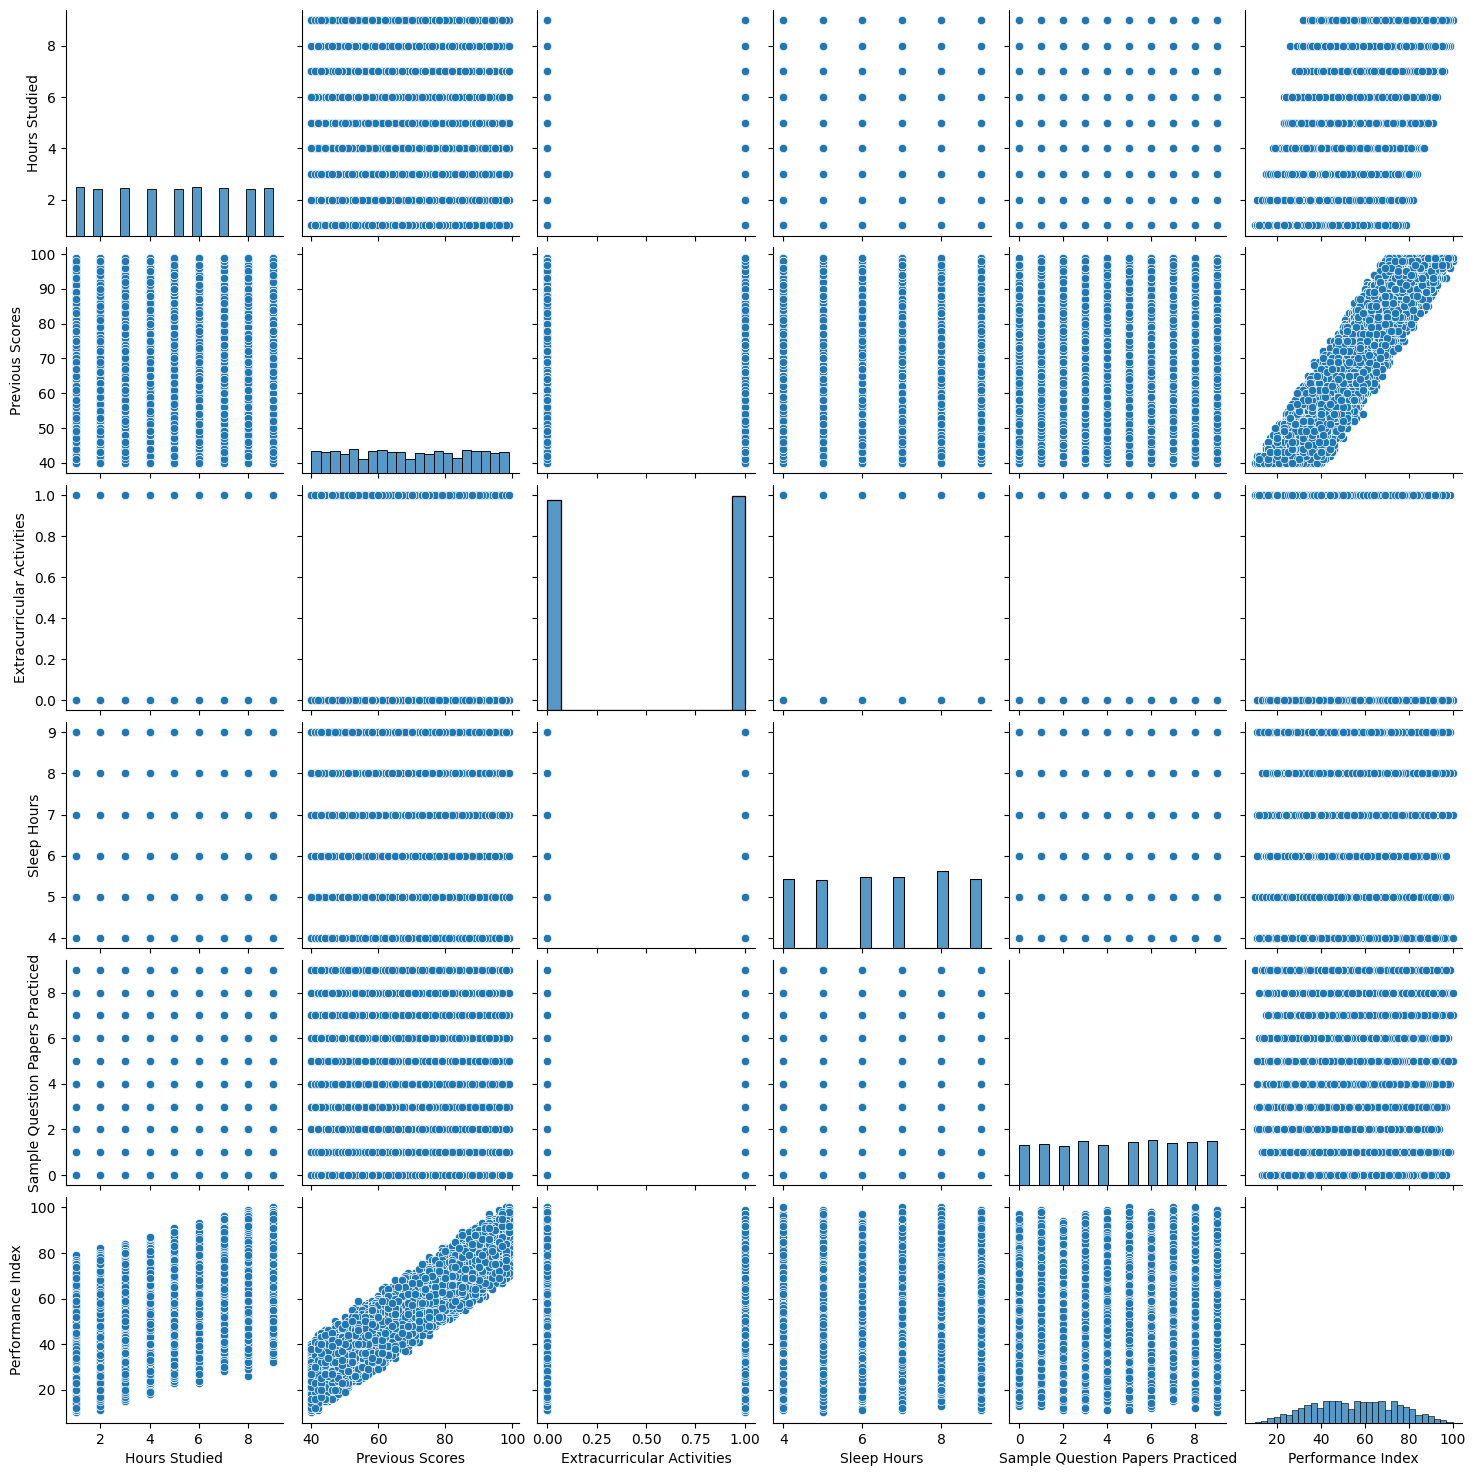

In [9]:
sns.pairplot(data =data)

In [28]:
x = data.drop(['Performance Index'], axis=1)
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,0,9,1
1,4,82,1,4,2
2,8,51,0,7,2
3,5,52,0,5,2
4,7,75,1,8,5
...,...,...,...,...,...
9995,1,49,0,4,2
9996,7,64,0,8,5
9997,6,83,0,8,5
9998,9,97,0,7,0


In [29]:
y = data['Performance Index']

In [30]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [33]:
x_train.shape

(8000, 5)

In [34]:
x_test.shape

(2000, 5)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

LinearRegression()

In [36]:
print('Coeff m', regressor.coef_)
print('coeff b',regressor.intercept_)

Coeff m [ 2.84744462  1.01775426 -0.58860057  0.4851642   0.19554892]
coeff b -33.43431431777014


In [38]:
ypre = regressor.predict(x_test)

In [39]:
ypre

array([87.86911783, 52.50474052, 41.08896117, ..., 35.78321594,
       80.77773891, 33.12300481])

In [40]:
y_test

7825    89.0
1609    50.0
4593    39.0
642     25.0
7748    34.0
        ... 
6202    45.0
1453    67.0
6870    35.0
4010    85.0
633     34.0
Name: Performance Index, Length: 2000, dtype: float64

Text(0, 0.5, 'predictions')

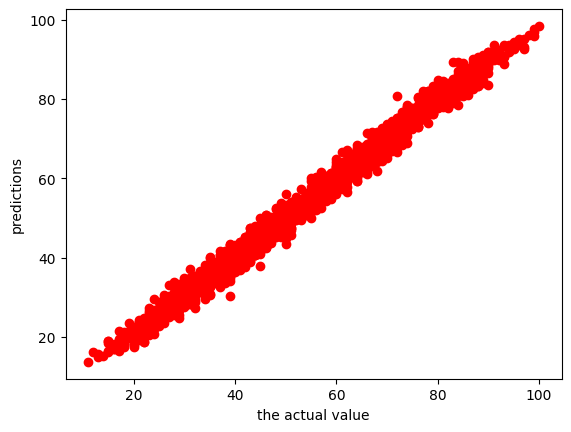

In [41]:
plt.scatter(y_test, ypre, c='r')
plt.xlabel('the actual value')
plt.ylabel('predictions')

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
k = x_test.shape[1]
n = len(x_test)

In [44]:
k

5

In [45]:
n

2000

In [46]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, ypre)), '.3f'))
mse = mean_squared_error(y_test, ypre)
mae = mean_absolute_error(y_test, ypre)
r2 = r2_score(y_test, ypre)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)


print('\nrmse = ', rmse, '\n mse = ', mse , '\n mae = ', mae , ' \nr2 = ', r2, '\n adjusted r2 = ',adj_r2)




rmse =  2.061 
 mse =  4.247182840004088 
 mae =  1.6410356227504121  
r2 =  0.9884305880478752 
 adjusted r2 =  0.9884015774863102


In [51]:
predata = data.iloc[23]
predata

Hours Studied                        1.0
Previous Scores                     85.0
Extracurricular Activities           1.0
Sleep Hours                          5.0
Sample Question Papers Practiced     6.0
Performance Index                   57.0
Name: 23, dtype: float64

In [53]:
actual = predata['Performance Index']
actual


57.0

In [57]:
traindata =[[1, 85, 1 , 5, 6]]
traindata.shape

AttributeError: 'list' object has no attribute 'shape'

In [58]:
predicted = regressor.predict(traindata)
predicted

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58.93275636])

In [59]:
actual

57.0

difference in actual and predicted  = 58.93 - 57  = 1.93